In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale

In [5]:
df = pd.read_csv('C:\\Users\Siyavash\Desktop\S&P+500+Stock+Prices+2014-2017.csv\S&P 500 Stock Prices 2014-2017.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Siyavash\AppData\Local\Temp\ipykernel_9316\4029717463.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('C:\\Users\Siyavash\Desktop\S&P+500+Stock+Prices+2014-2017.csv\S&P 500 Stock Prices 2014-2017.csv')


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [6]:
df.dtypes

symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [7]:
df.drop(['date' , 'symbol'] , axis=1 , inplace = True)
df

,open,high,low,close,volume
0,25.0700,25.8200,25.0600,25.3600,8998943
1,79.3828,79.5756,78.8601,79.0185,58791957
2,110.3600,111.8800,109.2900,109.7400,542711
3,52.1200,52.3300,51.5200,51.9800,4569061
4,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...
497467,68.5300,68.8000,67.9200,68.2000,1046677
497468,82.6400,82.7100,81.5900,81.6100,1347613
497469,121.7500,121.9500,120.6200,120.6700,1023624
497470,51.2800,51.5500,50.8100,50.8300,1261916


In [8]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [11]:
df.isnull().sum()

open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [13]:
df.fillna(method = 'ffill' , inplace = True)
df.isnull().sum()

C:\Users\Siyavash\AppData\Local\Temp\ipykernel_9316\1628263055.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill' , inplace = True)


open      0
high      0
low       0
close     0
volume    0
dtype: int64

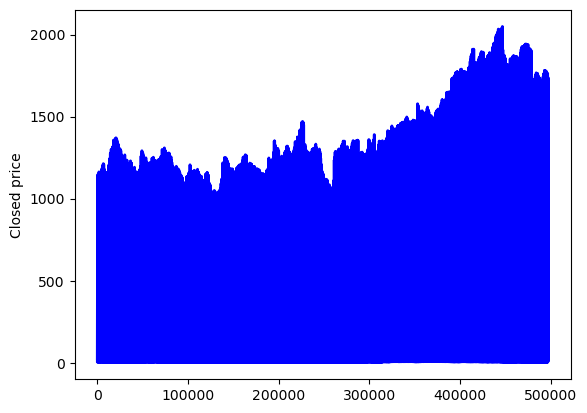

In [14]:
plt.plot(df['close'] , linewidth=2.0 , c = 'b') 
plt.ylabel('Closed price')
plt.show()

In [16]:
df['change'] = df['close'] - df['open']
df['low-high']  = df['low'] - df['high']
## Profit is defined inorder to measure daily changes of price according to 'close' price
df['prof'] = np.where(df['close'].shift(-1) > df['close'], df['close'].shift(-1) - df['close'], df['close'] - df['close'].shift(-1))
df

,open,high,low,close,volume,change,low-high,prof
0,25.0700,25.8200,25.0600,25.3600,8998943,0.2900,-0.7600,53.6585
1,79.3828,79.5756,78.8601,79.0185,58791957,-0.3643,-0.7155,30.7215
2,110.3600,111.8800,109.2900,109.7400,542711,-0.6200,-2.5900,57.7600
3,52.1200,52.3300,51.5200,51.9800,4569061,-0.1400,-0.8100,17.9100
4,70.1100,70.2300,69.4800,69.8900,1148391,-0.2200,-0.7500,31.6600
...,...,...,...,...,...,...,...,...
497467,68.5300,68.8000,67.9200,68.2000,1046677,-0.3300,-0.8800,13.4100
497468,82.6400,82.7100,81.5900,81.6100,1347613,-1.0300,-1.1200,39.0600
497469,121.7500,121.9500,120.6200,120.6700,1023624,-1.0800,-1.3300,69.8400
497470,51.2800,51.5500,50.8100,50.8300,1261916,-0.4500,-0.7400,21.2100


In [18]:
df.fillna(method = 'ffill' , inplace = True)
df

C:\Users\Siyavash\AppData\Local\Temp\ipykernel_9316\2439837554.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill' , inplace = True)


,open,high,low,close,volume,change,low-high,prof
0,25.0700,25.8200,25.0600,25.3600,8998943,0.2900,-0.7600,53.6585
1,79.3828,79.5756,78.8601,79.0185,58791957,-0.3643,-0.7155,30.7215
2,110.3600,111.8800,109.2900,109.7400,542711,-0.6200,-2.5900,57.7600
3,52.1200,52.3300,51.5200,51.9800,4569061,-0.1400,-0.8100,17.9100
4,70.1100,70.2300,69.4800,69.8900,1148391,-0.2200,-0.7500,31.6600
...,...,...,...,...,...,...,...,...
497467,68.5300,68.8000,67.9200,68.2000,1046677,-0.3300,-0.8800,13.4100
497468,82.6400,82.7100,81.5900,81.6100,1347613,-1.0300,-1.1200,39.0600
497469,121.7500,121.9500,120.6200,120.6700,1023624,-1.0800,-1.3300,69.8400
497470,51.2800,51.5500,50.8100,50.8300,1261916,-0.4500,-0.7400,21.2100


In [20]:
df['target'] = np.where(df['close'] .shift(-1)> df['close'], 1, 0)
df.head(8)
## In 'target' column '1' represent a positive change of price that is a sign for buying; On the contrary'0' coresponds to negative changes.

,open,high,low,close,volume,change,low-high,prof,target
0,25.0700,25.8200,25.0600,25.3600,8998943,0.2900,-0.7600,53.6585,1
1,79.3828,79.5756,78.8601,79.0185,58791957,-0.3643,-0.7155,30.7215,1
2,110.3600,111.8800,109.2900,109.7400,542711,-0.6200,-2.5900,57.7600,0
3,52.1200,52.3300,51.5200,51.9800,4569061,-0.1400,-0.8100,17.9100,1
4,70.1100,70.2300,69.4800,69.8900,1148391,-0.2200,-0.7500,31.6600,0
5,38.0900,38.4000,38.0000,38.2300,4967472,0.1400,-0.4000,42.9000,1
6,81.5000,81.9200,81.0900,81.1300,2405384,-0.3700,-0.8300,21.8400,0
7,59.0600,59.5300,58.9400,59.2900,2746370,0.2300,-0.5900,10.0100,0


In [23]:
scale_df = scale(df)
sdf = pd.DataFrame(scale_df , index=df.index , columns=df.columns)
sdf

,open,high,low,close,volume,change,low-high,prof,target
0,-0.603938,-0.599269,-0.601489,-0.601239,0.576440,0.156043,0.367538,-0.124327,1.005034
1,-0.068681,-0.073857,-0.066539,-0.072439,6.625058,-0.218284,0.387482,-0.315302,1.005034
2,0.236603,0.241889,0.236035,0.230318,-0.450782,-0.364570,-0.452611,-0.090178,-0.994991
3,-0.337358,-0.340158,-0.338390,-0.338901,0.038319,-0.089961,0.345130,-0.421971,1.005034
4,-0.160065,-0.165202,-0.159808,-0.162400,-0.377207,-0.135730,0.372020,-0.307488,-0.994991
...,...,...,...,...,...,...,...,...,...
497467,-0.175636,-0.179179,-0.175319,-0.179055,-0.389563,-0.198661,0.313758,-0.459438,1.005034
497468,-0.036580,-0.043221,-0.039394,-0.046900,-0.353007,-0.599132,0.206197,-0.245875,1.005034
497469,0.348852,0.340315,0.348693,0.338032,-0.392363,-0.627737,0.112082,0.010401,-0.994991
497470,-0.345636,-0.347782,-0.345449,-0.350234,-0.363417,-0.267313,0.376501,-0.394495,1.005034


In [26]:
x = sdf[['volume','change','low-high','prof']]
y = df['target']

In [29]:
sdf[['low-high','prof']].corr()

,low-high,prof
low-high,1.000000,-0.489276
prof,-0.489276,1.000000


In [31]:
x_trainset,x_testset,y_trainset,y_testset=train_test_split(x , y , test_size=0.2)

In [33]:
stock_tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)
stock_tree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
stock_tree.score(x_testset,y_testset)

0.7125785215337455